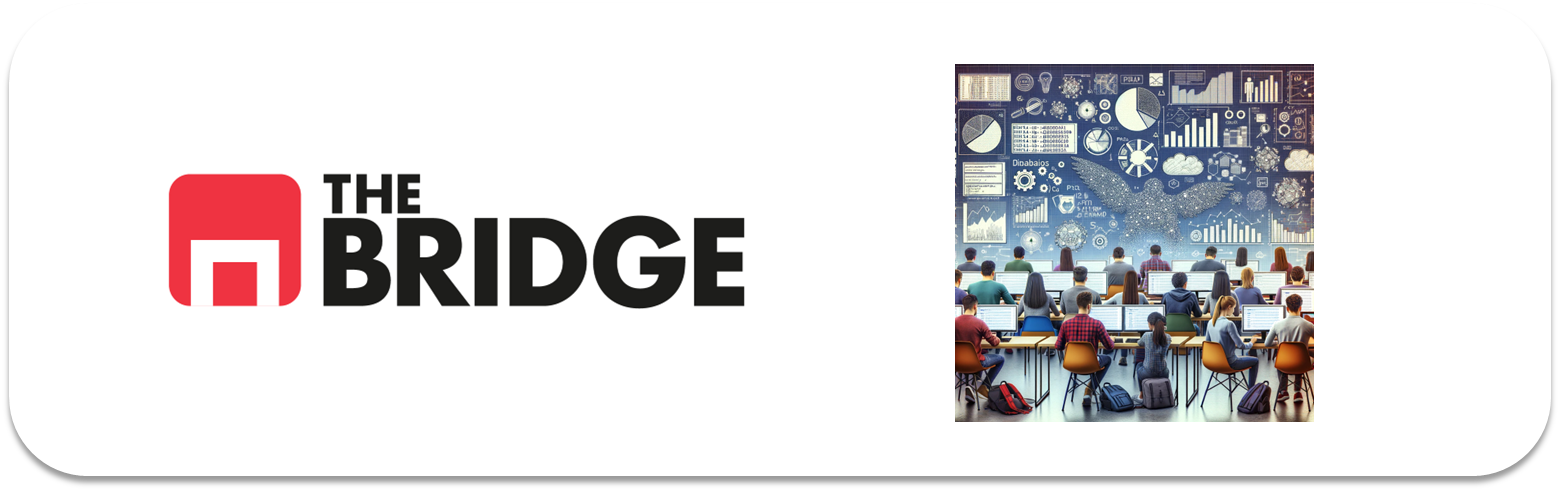

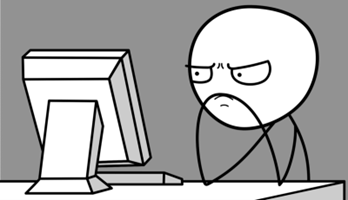

Para ejercitarte y afianzar lo aprendido sobre **Modelado RL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Ejercicio 1: Cargar los datos

Primero, cargaremos el conjunto de datos de diabetes. Hazlo en la celda de abajo importando los conjuntos de datos y luego cargando el conjunto de datos en la variable `diabetes` usando la función `load_diabetes()` ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)). Muestra los datos invocando la variable (ojo no es un `dataframe`) y luego muestra los valores de sus "claves".


In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

### Ejercicio 2: Entender los datos


Imprime la descripción en la celda de abajo usando el atributo `DESCR` de la variable `diabetes`. Lee la descripción de los datos cuidadosamente para entender completamente lo que representa cada columna.



In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Basándote en la descripción de los datos, responde a las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué significan?

2. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`?

3. ¿Cuántos registros hay en los datos?


*1*

In [5]:
print(len(diabetes['feature_names']),'variables')


10 variables


- age     edad en años
- sex
- bmi     índice de masa corporal
- bp      presión arterial promedio
- s1      tc, colesterol total en suero
- s2      ldl, lipoproteínas de baja densidad
- s3      hdl, lipoproteínas de alta densidad
- s4      tch, colesterol total / HDL
- s5      ltg, posiblemente el logaritmo del nivel de triglicéridos en suero
- s6      glu, nivel de azúcar en sangre


*2*

Los atributos,  indicadores y medidas de pacientes de diabetes, son potenciales predictores de la variable target, que es el avance de la diabetes un año después de la toma de medidas (o de la baseline de su nivel de diabetes)

*3*

In [6]:
print(len(diabetes['target']),'registros')

442 registros


### Ejercicio 3: ETL basica

Crea una `dataframe` pandas que contenga todos los datos, llamalo `X`. Crea una variable `y` que contenga el target. Echa un vistazo y muestra la info general del mismo.

In [7]:
X = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
y = pd.Series(diabetes['target'])

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


*Está limpio y preparado, así que eso que nos ahorramos. Echemos un vistazo al target, esto es legítimo antes del test-train split*

<Axes: >

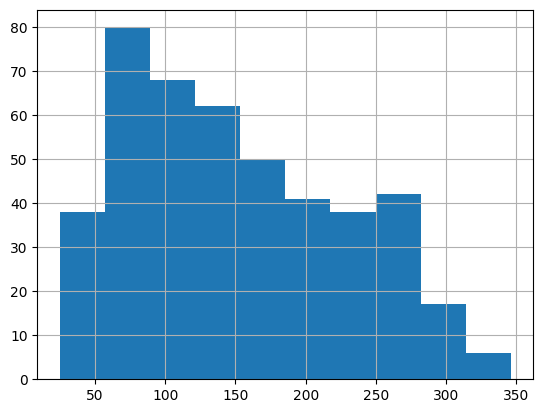

In [9]:
y.hist()

*No es que sea gaussiana o normal pero no tiene mala pinta para hacer una regresión lineal*


### Ejercicio 4: Train y test

Crea los dataset de train y test, pero no uses el `train_test_split` de `sklearn`. Crea los siguientes datasets: `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test` y `diabetes_target_test`. Usa los últimos 20 registros para los datos de prueba y el resto para los datos de entrenamiento.


*Desde el diccionario*

In [10]:
diabetes_data_train = diabetes['data'][:-20]
diabetes_target_train = diabetes['target'][:-20]

diabetes_data_test = diabetes['data'][-20:]
diabetes_target_test = diabetes['target'][-20:]

*Desde el dataframe*

In [11]:
diabetes_data_train_df = X.iloc[:-20]
diabetes_target_train_df = y[:-20]

diabetes_data_test_df = X.iloc[-20:]
diabetes_target_test_df = y[-20:]

In [12]:
diabetes_data_train_df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
417 -0.052738 -0.044642  0.071397 -0.074527 -0.015328 -0.001314  0.004460   
418  0.009016 -0.044642 -0.024529 -0.026328  0.098876  0.094196  0.070730   
419 -0.020045 -0.044642 -0.054707 -0.053870 -0.066239 -0.057367  0.011824   
420  0.023546 -0.044642 -0.036385  0.000079  0.001183  0.034698 -0.043401   
421  0.038076  0.050680  0.016428  0.021872  0.039710  0.045032 -0.043401   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1   -0.039493 -0.068332 -0.092204  
2   -0.002592  0.002861 -0.025930  
3    0.034309  0.022688 -0.009362  
4   -0.002592 -0.031988 -0.046641  
..        ...       ...       ...  
417 -0.021412 -0.046883  0.003064  
418 -0.002592 -0.021395  0.007207  
419 -0.039493 -0.074093 -0.005220  
420  0.034309 -0.033246  0.061054  
421  0.071210  0.049770  0.015491  

[422 rows x 10 columns]

### Ejercicio 5: MiniEDA

Como son todo variables numéricas muestra el coeficiente de correlación de todas las variables con el target. Independientemente del resultado quédate con todas las variables como features, crea una lista feature

*Necesitamos incluir el target en los datos de train. Creamos un dataframe intermedio para los propósitos del EDA*

In [13]:
df_eda = diabetes_data_train_df.copy()
df_eda["target"] = diabetes_target_train_df
df_eda

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
417 -0.052738 -0.044642  0.071397 -0.074527 -0.015328 -0.001314  0.004460   
418  0.009016 -0.044642 -0.024529 -0.026328  0.098876  0.094196  0.070730   
419 -0.020045 -0.044642 -0.054707 -0.053870 -0.066239 -0.057367  0.011824   
420  0.023546 -0.044642 -0.036385  0.000079  0.001183  0.034698 -0.043401   
421  0.038076  0.050680  0.016428  0.021872  0.039710  0.045032 -0.043401   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
417 -0.021412 -0.046883  0.003064    55.0  
418 -0.002592 -0.021395  0.007207    84.0  
419 -0.039493 -0.074093 -0.005220    42.0  
420  0.034309 -0.033246  0.061054   146.0  
421  0.071210  0.049770  0.015491   212.0  

[422 rows x 11 columns]

In [14]:
df_eda.corr(numeric_only= True)["target"].sort_values(ascending = False)

target    1.000000
bmi       0.578905
s5        0.559668
bp        0.437657
s4        0.433315
s6        0.387471
s1        0.217091
age       0.190093
s2        0.177490
sex       0.036863
s3       -0.393215
Name: target, dtype: float64

*Tienen todas buena pinta con algunas mejores que otras, salvo quizás la de sex, aún así vamos a considerarlas todas como features*

In [15]:
features_num = diabetes_data_train_df.columns.to_list()

### Ejercicio 6: Escogemos e instanciamos modelos

En nuestro caso no vamos a crear una baseline ni a escoger otro modelo más que el regresor lineal. Importa e instancia un modelo de ese tipo de la librería `sklearn`

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

### Ejercicio 7: Selección con cross-validation o entrenamiento

Cómo solo tenemos un modelo no hace falta emplear la cross-validation para comprobar sus prestaciones con otro (esta situación no será la normal en el futuro, pero ahora nos vale), así que pasamos directamente al entrenamiento. Entrena tu modelo:



In [17]:
lin_reg.fit(diabetes_data_train_df, diabetes_target_train_df)

LinearRegression()

Antes de seguir, ¿por qué no hemos escalado o tratado las features numéricas antes de hacer el entrenamiento?

*Si lees la descripción del dataset con detalle verás que se nos informa que las variables ya han pasado por un proceso de estandarización con lo que ya no es necesario volver a hacerlo*

### Ejercicio 8: Visualizando los parámetros


Imprime los coeficientes y el intercepto del modelo. Muéstralos luego como un dataframe.

In [18]:
lin_reg.coef_

array([ 3.06094248e-01, -2.37635570e+02,  5.10538048e+02,  3.27729878e+02,
       -8.14111926e+02,  4.92799595e+02,  1.02841240e+02,  1.84603496e+02,
        7.43509388e+02,  7.60966464e+01])

In [19]:
lin_reg.intercept_

152.76429169049118

In [20]:
pd.DataFrame(lin_reg.coef_, diabetes['feature_names'],columns=['Coefficient'])

Coefficient
age     0.306094
sex  -237.635570
bmi   510.538048
bp    327.729878
s1   -814.111926
s2    492.799595
s3    102.841240
s4    184.603496
s5    743.509388
s6     76.096646

### Ejercicio 9: Visualizando la regresión

Escribe la función de regresión, que constituye el corazón del modelo, (aproxima los coeficientes si lo crees conveniente):

$$\hat y = 152.764 + 0.306094248 \cdot \text{age} - 237.63557 \cdot \text{sex} + 510.538048 \cdot \text{bmi} + 327.729878 \cdot \text{bp} - 814.111926 \cdot \text{s1} + $$
$$ + 492.799595 \cdot \text{s2} + 102.84124 \cdot \text{s3} + 184.603496 \cdot \text{s4} + 743.509388 \cdot \text{s5} + 76.0966464 \cdot \text{s6}$$


### Ejercicio 10: Evaluación (I)

Muestra las predicciones para el dataset de test y muestra la diferencia con los valores reales:

In [21]:
y_pred = lin_reg.predict(diabetes_data_test_df)

In [22]:
print(diabetes_target_test_df - y_pred)

422    35.381015
423   -64.440320
424   -61.888751
425    40.467294
426   -44.793973
427   -64.067659
428    50.875588
429    -6.478737
430    65.939946
431   -58.302616
432   -45.368681
433    10.804181
434   -83.248379
435   -56.332935
436    -4.545130
437   -16.037468
438     1.424357
439     8.432213
440     8.965347
441     4.397783
dtype: float64


*Un poco más visual*

In [23]:
pd.DataFrame({"y_real": diabetes_target_test_df, "y_pred": y_pred, "err": diabetes_target_test_df - y_pred})

y_real      y_pred        err
422   233.0  197.618985  35.381015
423    91.0  155.440320 -64.440320
424   111.0  172.888751 -61.888751
425   152.0  111.532706  40.467294
426   120.0  164.793973 -44.793973
427    67.0  131.067659 -64.067659
428   310.0  259.124412  50.875588
429    94.0  100.478737  -6.478737
430   183.0  117.060054  65.939946
431    66.0  124.302616 -58.302616
432   173.0  218.368681 -45.368681
433    72.0   61.195819  10.804181
434    49.0  132.248379 -83.248379
435    64.0  120.332935 -56.332935
436    48.0   52.545130  -4.545130
437   178.0  194.037468 -16.037468
438   104.0  102.575643   1.424357
439   132.0  123.567787   8.432213
440   220.0  211.034653   8.965347
441    57.0   52.602217   4.397783

### Ejercicio 11

Importa las métricas de sklearn que necesites y, apoyandote en el método `score` del modelo, muestra el MAE, MSE, RMSE, MAPE y coeficiente de determinación $R^2$) para el modelo y el caso del test

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

predicted = lin_reg.predict(diabetes_data_test)

argumentos = (diabetes_target_test_df.values, y_pred)

print('MSE:', mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(mean_squared_error(*argumentos)))
print('MAE:', mean_absolute_error(*argumentos))
print('MAPE:', mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(diabetes_data_test_df, diabetes_target_test_df))

MSE: 2004.5186863342092
RMSE: 44.77185149548999
MAE: 36.60961865545879
MAPE: 0.3930876102873051
R2: 0.585085427447195


c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### EXTRA:

1. Pinta la comparación entre predicciones (eje x) y valores reales (eje y) y añade la diagonal y=x sobre la que deberían caer todos los puntos en un predictor perfecto.

Text(0, 0.5, 'Target')

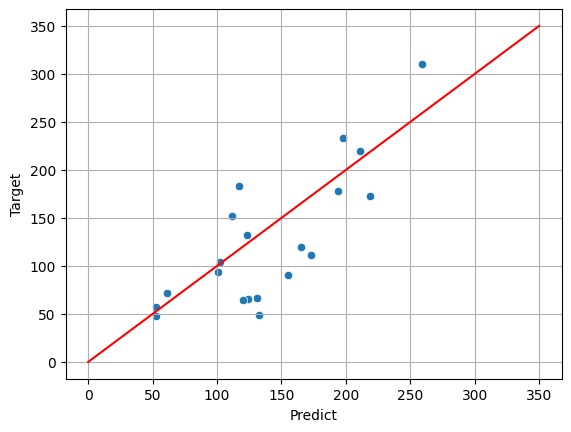

In [25]:

sns.scatterplot(y = diabetes_target_test_df.values, x = y_pred)
plt.plot([0,350],[0,350],'red')
plt.grid()
plt.xlabel('Predict')
plt.ylabel('Target')

2. Muestra la importancia de cada coeficiente de forma gráfica utilizando diagramas de barras horizontales (barh, en pyplot)

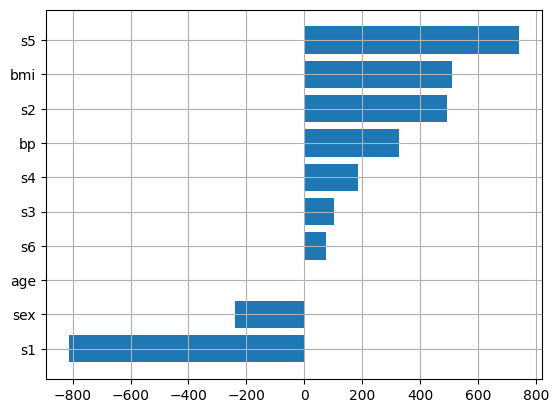

In [26]:
coef_df = pd.DataFrame(lin_reg.coef_, diabetes['feature_names'],columns=['Coefficient']).sort_values('Coefficient',ascending=True)
plt.barh(coef_df.index, coef_df.Coefficient)
plt.grid()